# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as nplin

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [3]:
from main import random_matrix_Ab

matrixes = []
vectors = []
sizes = [10,20,50,100,1000]

for m in sizes:
    Ab = random_matrix_Ab(int(m))

    if m  == 10:
        print("Macierze oraz wektor dla m = {}:\n".format(m))
        print("macierz A :\n {}\n".format(Ab[0]))
        print("wektor b:\n {}\n\n".format(Ab[1]))
    
    matrixes.append(Ab[0])
    vectors.append(Ab[1])

Macierze oraz wektor dla m = 10:

macierz A :
 [[108 133 340 440 211 104 244 337 270 277]
 [175  99 161  77 271   8 457 499 170 146]
 [413   6 146 105 347 445 117 430  62 185]
 [247 203  88  85  71 123  67 216 134  21]
 [419 209 264 388 343 268 135 212 226   2]
 [311 242 344 278 395 221 151 318 432 181]
 [239 370 484 409 403 258 263 293 319 375]
 [277  38 489 462 368 278  34 413   0 328]
 [291 143 149  42 423 271 426  62 211  48]
 [ 82  63 145 348 393 192 275 262 492 233]]

wektor b:
 [159  29 398  31 320 462 292 364 311 444]




***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

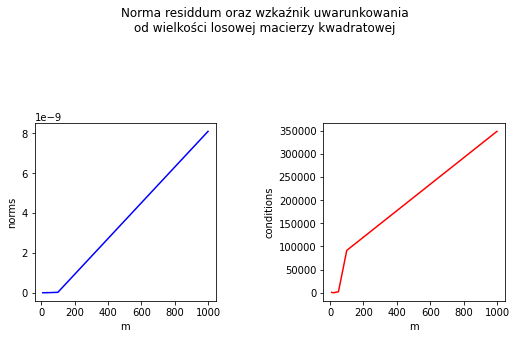

In [5]:
from main import residual_norm


x = []
norms = []
conditions = []

for i in range(5):
    x.append(nplin.solve(matrixes[i], vectors[i]))
    norms.append(residual_norm(matrixes[i], x[i], vectors[i]))
    conditions.append(nplin.cond(matrixes[i]))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sizes, norms, "b")
ax2.plot(sizes, conditions, "r")
fig.suptitle("Norma residdum oraz wzkaźnik uwarunkowania\nod wielkości losowej macierzy kwadratowej" )
fig.tight_layout(pad=3.0)
fig.set_figheight(5)
fig.set_figwidth(8)
ax1.set(xlabel='m', ylabel='norms')
ax2.set(xlabel='m', ylabel='conditions')
plt.show()



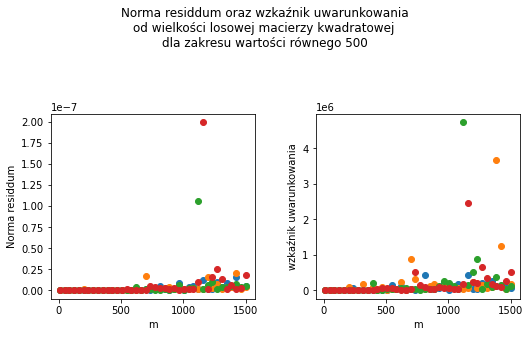

In [10]:
sizes = np.ndarray.tolist(np.linspace(10,1500, 40))


fig, (ax1, ax2) = plt.subplots(1, 2)

for el in range(4):
    x = []
    norms = []
    conditions = []
    i = 0

    for m in sizes :

        A, b = random_matrix_Ab(int(m))

        x.append(nplin.solve(A, b))
        norms.append(residual_norm(A, x[i], b))
        conditions.append(nplin.cond(A))
        i += 1

    ax1.scatter(sizes, norms)
    ax2.scatter(sizes, conditions)
    fig.suptitle("Norma residdum oraz wzkaźnik uwarunkowania\nod wielkości losowej macierzy kwadratowej \ndla zakresu wartości równego 500" )
    fig.tight_layout(pad=3.0)
    fig.set_figheight(5)
    fig.set_figwidth(8)
    ax1.set(xlabel='m', ylabel='Norma residdum')
    ax2.set(xlabel='m', ylabel='wzkaźnik uwarunkowania')

plt.show()

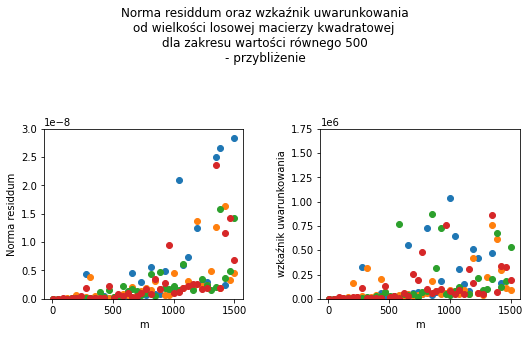

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)

for el in range(4):
    x = []
    norms = []
    conditions = []
    i = 0

    for m in sizes :

        A, b = random_matrix_Ab(int(m))

        x.append(nplin.solve(A, b))
        norms.append(residual_norm(A, x[i], b))
        conditions.append(nplin.cond(A))
        i += 1

    ax1.scatter(sizes, norms)
    ax2.scatter(sizes, conditions)
    fig.suptitle("Norma residdum oraz wzkaźnik uwarunkowania\nod wielkości losowej macierzy kwadratowej \ndla zakresu wartości równego 500\n- przybliżenie" )
    fig.tight_layout(pad=3.0)
    fig.set_figheight(5)
    fig.set_figwidth(8)
    ax1.set(xlabel='m', ylabel='Norma residdum', ylim=(0,0.3e-7))
    ax2.set(xlabel='m', ylabel='wzkaźnik uwarunkowania', ylim=(0,1.75e6))

plt.show()

Jak widać, na wszystkich wykreach można zaobserwować rosnący trend. To znaczy, że i norma reiduum, czyli błąd, jak i uwarunkowanie rosną, wraz ze zwiększeniem wymiarów macierzy

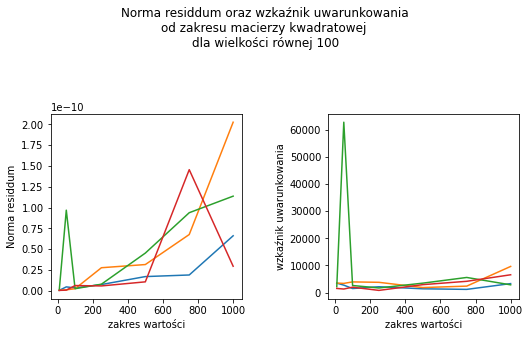

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

for el in range(4):

    x = []
    norms = []
    conditions = []
    i = 0

    for scope in [10, 50, 100, 250, 500, 750, 1000]:


        A, b = random_matrix_Ab(int(100), int(scope))

        x.append(nplin.solve(A, b))
        norms.append(residual_norm(A, x[i], b))
        conditions.append(nplin.cond(A))
        i += 1

    ax1.plot([10, 50, 100, 250, 500, 750, 1000], norms)
    ax2.plot([10, 50, 100, 250, 500, 750, 1000], conditions)
    fig.suptitle("Norma residdum oraz wzkaźnik uwarunkowania\nod zakresu macierzy kwadratowej \ndla wielkości równej 100" )
    fig.tight_layout(pad=3.0)
    fig.set_figheight(5)
    fig.set_figwidth(8)
    ax1.set(xlabel='zakres wartości', ylabel='Norma residdum')
    ax2.set(xlabel='zakres wartości', ylabel='wzkaźnik uwarunkowania')

plt.show()


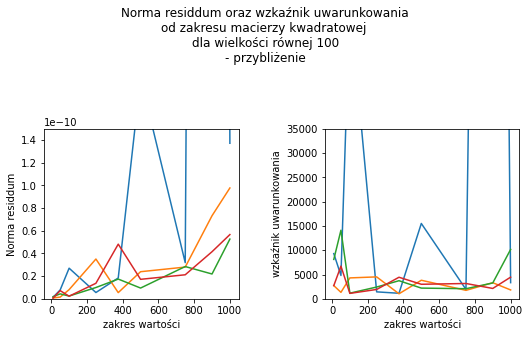

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sc = [10, 50, 100, 250, 375, 500, 750, 900, 1000]


for el in range(4):

    x = []
    norms = []
    conditions = []
    i = 0

    for scope in sc:


        A, b = random_matrix_Ab(int(100), int(scope))

        x.append(nplin.solve(A, b))
        norms.append(residual_norm(A, x[i], b))
        conditions.append(nplin.cond(A))
        i += 1

    ax1.plot(sc, norms)
    ax2.plot(sc, conditions)
    fig.suptitle("Norma residdum oraz wzkaźnik uwarunkowania\nod zakresu macierzy kwadratowej \ndla wielkości równej 100\n- przybliżenie" )
    fig.tight_layout(pad=3.0)
    fig.set_figheight(5)
    fig.set_figwidth(8)
    ax1.set(xlabel='zakres wartości', ylabel='Norma residdum', ylim=(0,1.5e-10))
    ax2.set(xlabel='zakres wartości', ylabel='wzkaźnik uwarunkowania', ylim=(0,35000))

plt.show()

Im większy zakres wartości macierzy, tym większa wartość normy residuum. Uwarunkowanie zachowuje się trochę mniej jednoznacznie
Wygląda, jakby wzkaźnik uwarunkowania wykazywał tendenjcę rosnącą (dużo mniej widocznie, niż dla poprzednich wykresów),
lecz jest możliwe, że wykonałam zbyt mało obliczeń
dla zbyt małego zakresu wartości, ze względu na ograniczenia sprzętowe

Podsumowanie:

Wzkaźnik uwarunkowania określa, w jakim stopniu błąd danych wejściowych danego problemu wpływa na błąd wyniku
Dla obu przyadków wartość wzkaźnika uwarunkowania rośnie, a co za tym idzie, rośnie także i błąd.
Dla zwiększana sie wielkości macierzy oby dwa wyniki rosną dużo bardziej widocznie, niż dla zwiększającego się zakresu
Może to być wywołane po prostu szybko zwiększającą się ilością potrzebnych obliczeń - im więcej obliczeń, tym więcej
potencjalnych błędów się na siebie nałoży

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [121]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 

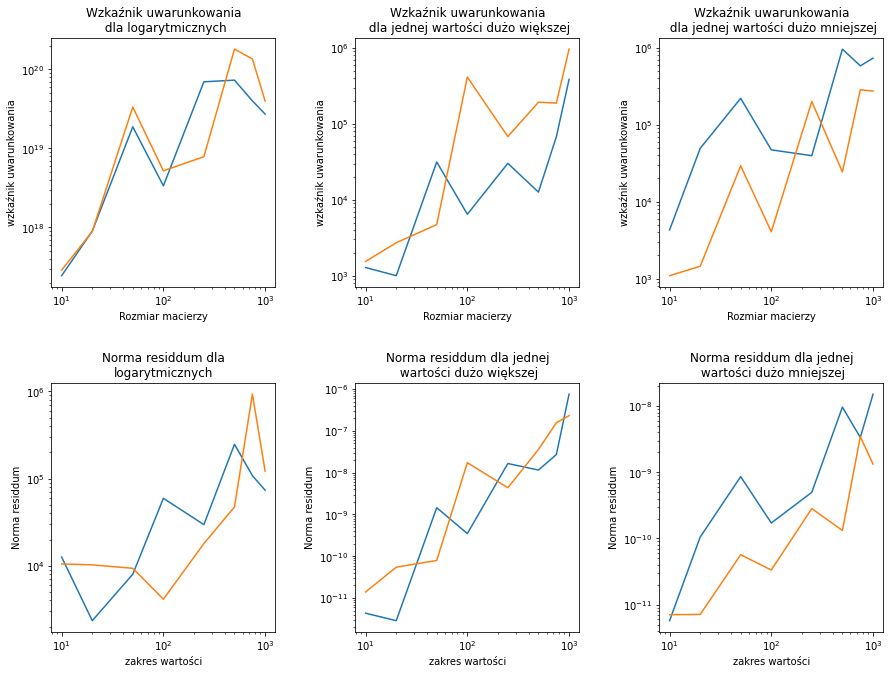

In [77]:
from main import create_matrix_from_A, log_sing_value, order_sing_value
sizes = [10, 20, 50, 100, 250, 500, 750, 1000]
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

for el in range(2):

    cond_log = []
    cond_smaller= []
    cond_bigger = []
    norm_log = []
    norm_smaller= []
    norm_bigger = []
    x = []
    i = 0
    
    for m in sizes:
        
        A, b = random_matrix_Ab(int(m))
        
        
        sing_log = log_sing_value(m, 0, 75)
        sing_smaller = order_sing_value(m, site = "low")
        sing_bigger = order_sing_value(m, site = "gre")


        matrix_sing_log = create_matrix_from_A(A, sing_log)
        matrix_sing_bigger = create_matrix_from_A(A, sing_bigger)
        matrix_sing_smaller = create_matrix_from_A(A, sing_smaller)
        
        x_log = nplin.solve(matrix_sing_log, b)
        x_big = nplin.solve(matrix_sing_bigger, b)
        x_sm = nplin.solve(matrix_sing_smaller, b)
        
        

        cond_bigger.append(nplin.cond(matrix_sing_bigger))
        cond_log.append(nplin.cond(matrix_sing_log))
        cond_smaller.append(nplin.cond(matrix_sing_smaller))
        
        norm_bigger.append(residual_norm(matrix_sing_bigger, x_big, b))
        norm_log.append(residual_norm(matrix_sing_log, x_log,b))
        norm_smaller.append(residual_norm(matrix_sing_smaller, x_sm, b))

    ax1.plot(sizes,cond_log)
    ax1.set (title="Wzkaźnik uwarunkowania\n dla logarytmicznych", xlabel="Rozmiar macierzy", ylabel="wzkaźnik uwarunkowania",xscale="log", yscale="log")
    
    ax2.plot(sizes,cond_bigger)
    ax2.set (title="Wzkaźnik uwarunkowania\n dla jednej wartości dużo większej", xlabel="Rozmiar macierzy", ylabel="wzkaźnik uwarunkowania",xscale="log", yscale="log")
    
    ax3.plot(sizes,cond_smaller)
    ax3.set (title="Wzkaźnik uwarunkowania\n dla jednej wartości dużo mniejszej", xlabel="Rozmiar macierzy", ylabel="wzkaźnik uwarunkowania",xscale="log", yscale="log")
    
    ax4.plot(sizes,norm_log)
    ax4.set(title="Norma residdum dla\nlogarytmicznych",xlabel='zakres wartości', ylabel='Norma residdum',xscale="log", yscale="log")
    
    ax5.plot(sizes,norm_bigger)
    ax5.set(title="Norma residdum dla jednej\n wartości dużo większej",xlabel='zakres wartości', ylabel='Norma residdum',xscale="log", yscale="log")
    
    ax6.plot(sizes,norm_smaller)
    ax6.set(title="Norma residdum dla jednej\n wartości dużo mniejszej",xlabel='zakres wartości', ylabel='Norma residdum',xscale="log", yscale="log")
    
    fig.set_figheight(10)
    fig.set_figwidth(13)
    fig.tight_layout(pad=3.0)
    
plt.show()

Tak naprawdę, to wyliczanie macierzy nie jest konieczne, oczywiście jedynie jeśli wcześniej znamy wartości singularne macierzy.
Współczynnik można obliczyć ze wzoru k = s1/sn czyli stosunku największej i najmniejszej wartości singularnej


Jak widać na powyższych wykresach, norma i uwarunkowanie są ze sobą bardzo ściśle powiązane. Największa wartość
wzkaźnika uwarunkowania, a także i błędu jest dla podmienionych wartości singularnych na logarytniczne (błąd jest
nawet 10^6 - jest to ogromna wartość. Dla jednej wartości mniejszej bądz większej uwarunkowania są podobne
zmieniamy w końcu jedną wartość o ten sam rząd w obu przypadkach (wzór na uwarunkowanie podany wyżej : k = s1/sn)

Podsumowanie: wartości singularne mają bardzo duży wpływ na uwrunkowania i błąd obliczeń

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)